In [10]:
import pandas as pd
import numpy as np

#from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA,NMF
from sklearn.manifold.t_sne import TSNE
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.metrics import accuracy_score

In [2]:
#loading, shuffling, spliting data:
big_train = pd.read_csv('./data/train.csv')

test = pd.read_csv('./data/test.csv')

big_train = shuffle(big_train)

train = big_train[:5000]

X_train, X_test, y_train, y_test = train_test_split(train.drop('label',axis=1),
                                                    train['label'],
                                                    test_size=0.20, 
                                                    random_state=42)

X_train_all, y_train_all = train.drop('label',axis=1), train['label']

X_test_all = test

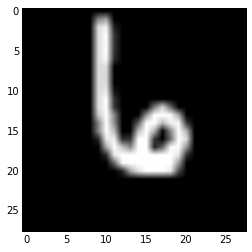

In [51]:
plt.imshow(np.array(X_train.T[123]).reshape(28,28),cmap='gray')

#PCA with 2 components

In [9]:

p = PCA(n_components=2,)

In [10]:
X_pca = p.fit_transform(X_train)

In [22]:
X_pca = X_pca.T

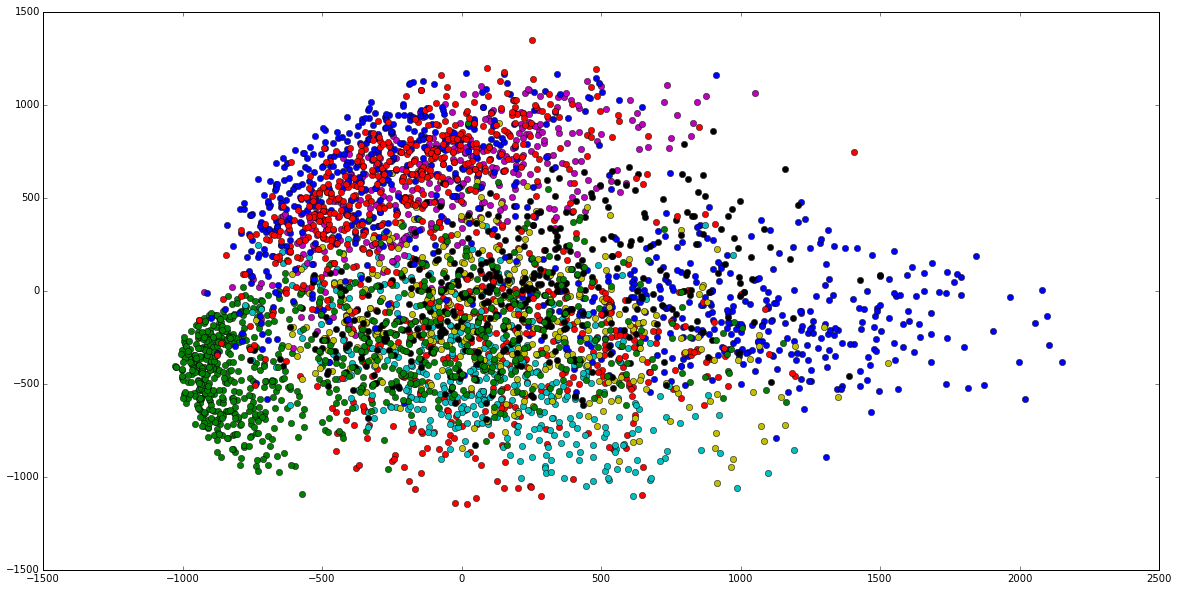

In [52]:
plt.figure(figsize=(20,10))
for j in range(10):
    plt.plot([X_pca[0][i] for i in range(len(X_pca[0])) if np.array(y_train)[i] == j],
             [X_pca[1][i] for i in range(len(X_pca[0])) if np.array(y_train)[i] == j],'o')
plt.show()

#PCA with 3 components

In [3]:
p3 = PCA(n_components=3)

In [4]:
X_pca3 = p3.fit_transform(X_train)

In [5]:
X_pca3 = X_pca3.T

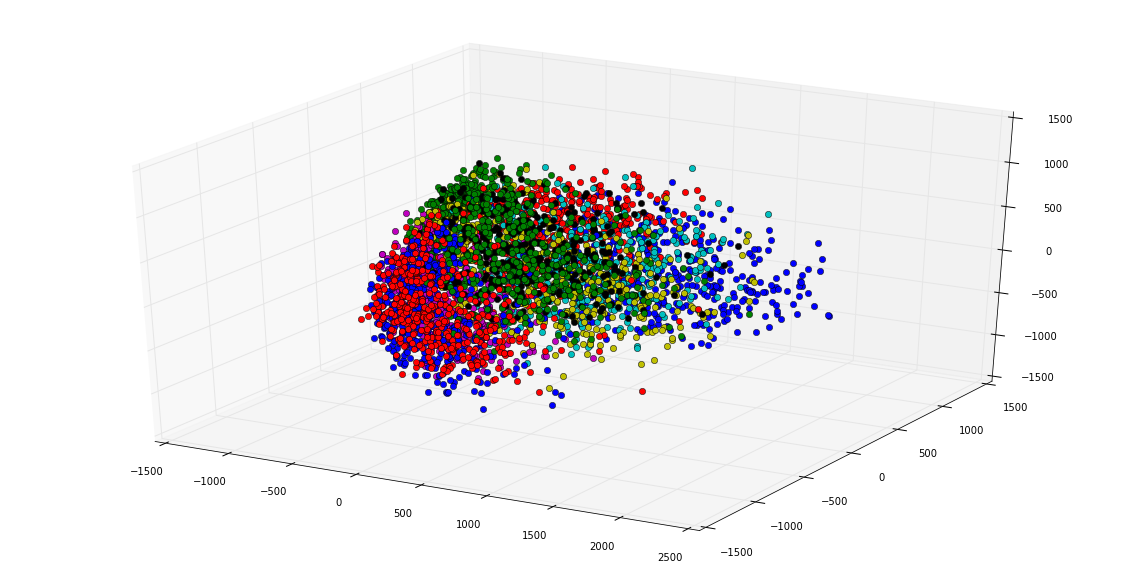

In [13]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
z = X_pca3[2]
x = X_pca3[0]
y = X_pca3[1]
for j in range(10):
    plt.plot([x[i] for i in range(len(X_pca3[0])) if np.array(y_train)[i] == j],
             [y[i] for i in range(len(X_pca3[0])) if np.array(y_train)[i] == j],
             [z[i] for i in range(len(X_pca3[0])) if np.array(y_train)[i] == j],'o')
ax.legend()

plt.show()

#tSNE

In [14]:
t = TSNE(n_components=2)
X_tsne = t.fit_transform(X_train)

In [3]:
X_tsne = X_tsne.T

plt.figure(figsize=(20,10))

for j in range(10):
    plt.plot([X_tsne[0][i] for i in range(len(X_tsne[0])) if np.array(y_train)[i] == j],
             [X_tsne[1][i] for i in range(len(X_tsne[0])) if np.array(y_train)[i] == j],'o',)

NameError: name 'X_tsne' is not defined

In [28]:
n = NMF(n_components=2)

In [29]:
X_nmf = n.fit_transform(X_train)

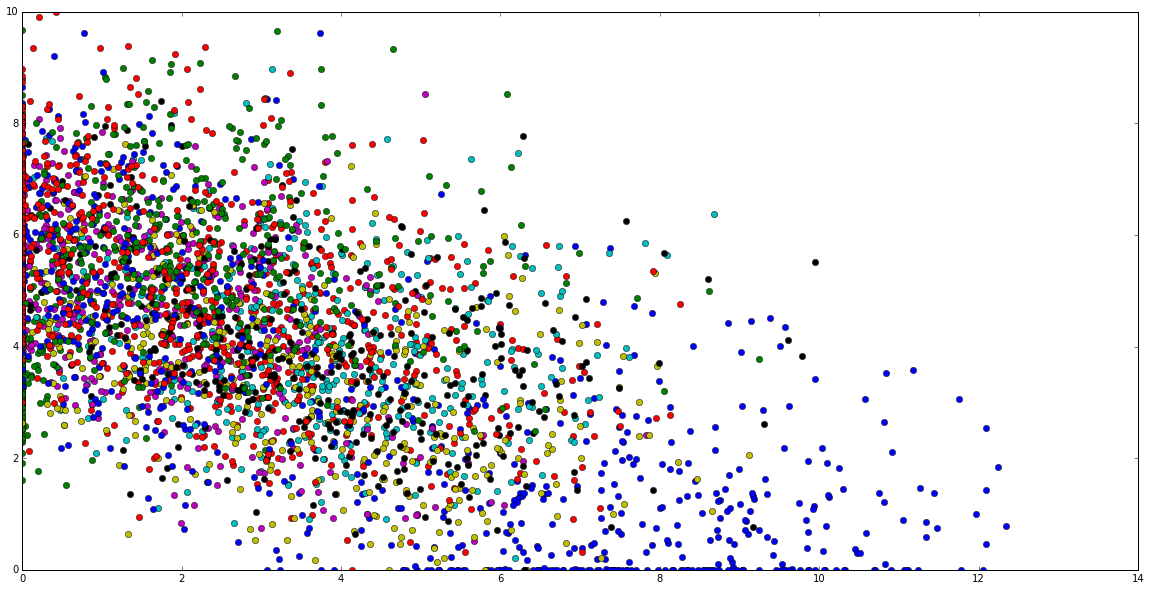

In [32]:
X_nmf = X_nmf.T

plt.figure(figsize=(20,10))
for j in range(10):
    plt.plot([X_nmf[0][i] for i in range(len(X_nmf[0])) if np.array(y_train)[i] == j],
             [X_nmf[1][i] for i in range(len(X_nmf[0])) if np.array(y_train)[i] == j],'o')
plt.show()